In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        #print(os.path.join(dirname, filename))\n"

# Getting the data then showing them on plots

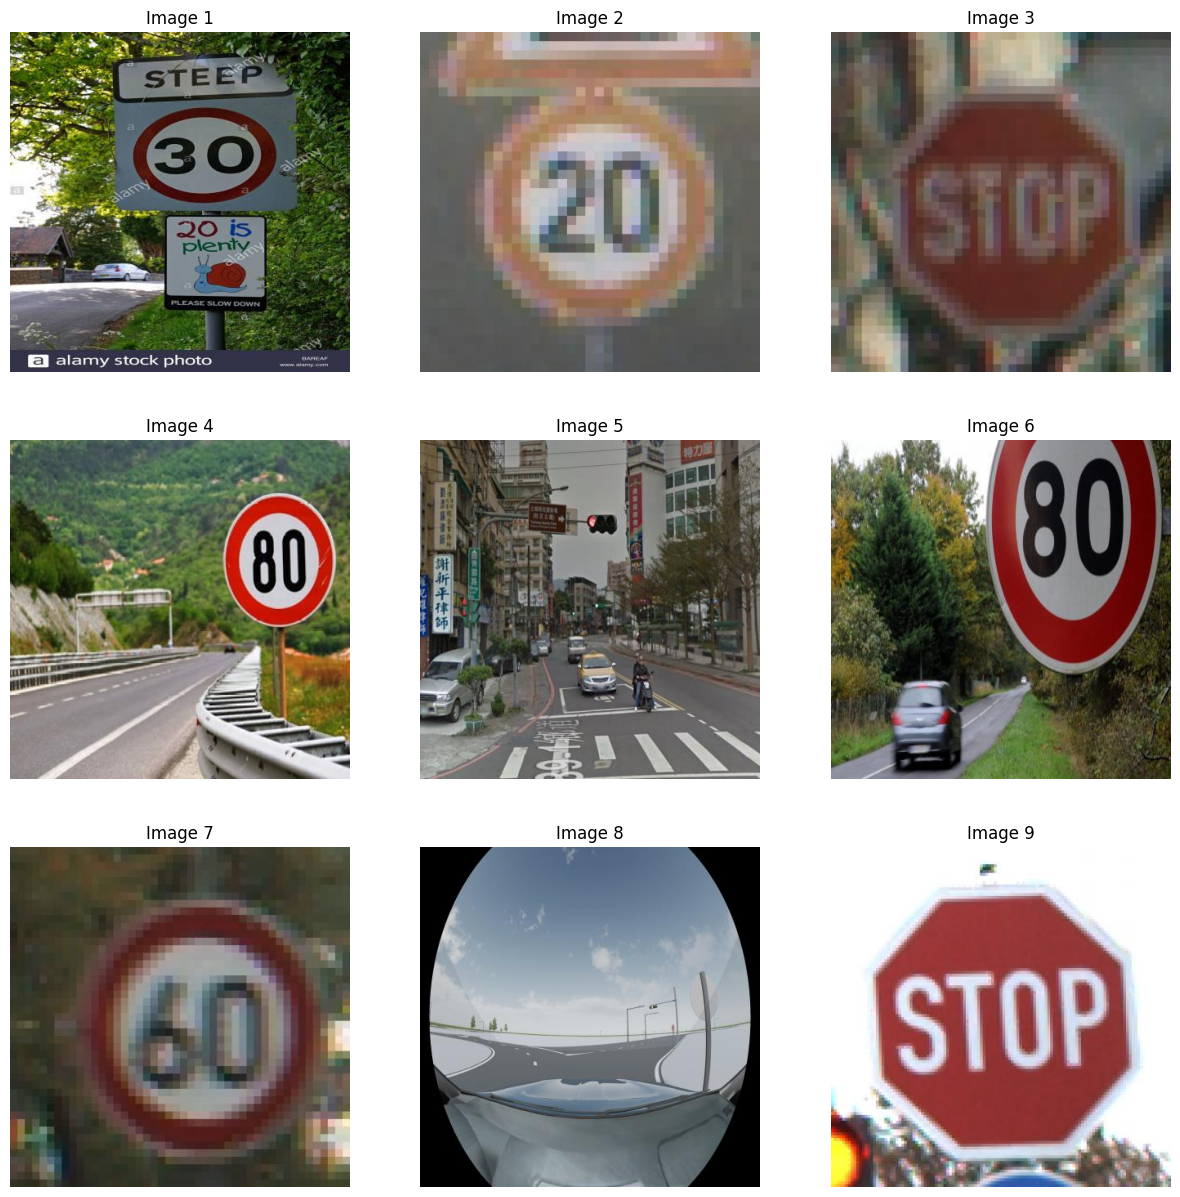

In [4]:
import random 
import cv2
import matplotlib.pyplot as plt

inp_dir = '/kaggle/input/cardetection/car/train'
num = 9
i,j = 0,0
all_images = [os.path.join(inp_dir,'images',each) for each in os.listdir(os.path.join(inp_dir,'images'))]

samples = random.sample(all_images,num)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))


#plotting 9 random images
for i in range(3):
    for j in range(3):
        cnt = (i*3)+j
        link = samples[cnt]
        img = cv2.imread(link)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Display the image on the subplot axis
        axs[i, j].imshow(img_rgb)
        axs[i, j].set_title(f'Image {cnt + 1}')
        axs[i, j].axis('off')  # Hide the axes

# Save the Yolo model then making pre-validation

# **About YOLO:**

YOLO uses a single **convolutional neural network(CNN)** to predict both *the bounding boxes of objects and their class probabilities*. This end-to-end learning approach simplifies the object detection pipeline, allowing the model to be trained directly on the task at hand, *without needing separate stages for region proposals, classification, and bounding box regression*

---- 
YOLO frameworks often include pre-defined scripts for running inference on images, videos, and even live streams. These scripts handle loading the model, processing input data, making predictions, and outputting results.
----


In [5]:
#YOLO is needed for object detection algorithm 

!pip install ultralytics
from ultralytics import YOLO
# ultralytics here is to install for object detection.

# Load the YOLOv8 model
model = YOLO("yolov8n.pt") 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 14.6 MB/s eta 0:00:00a 0:00:01


100%|██████████| 6.25M/6.25M [00:00<00:00, 22.7MB/s]



image 1/1 /kaggle/input/cardetection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg: 640x640 1 person, 6.7ms
Speed: 12.8ms preprocess, 6.7ms inference, 215.0ms postprocess per image at shape (1, 3, 640, 640)


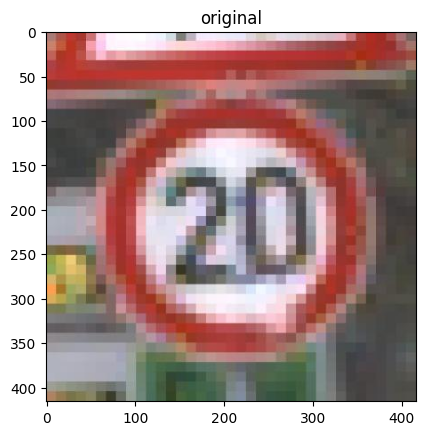

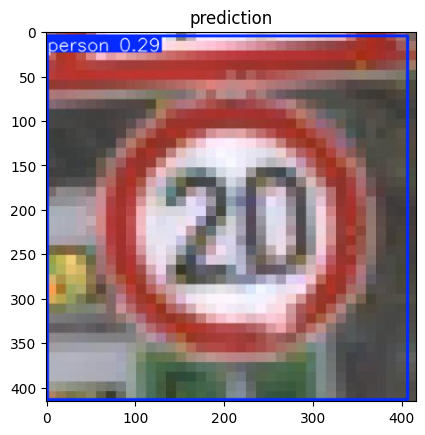

In [6]:
'''
Prediction with Pre-Train Model which is YOLO8n
'''
image = '/kaggle/input/cardetection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg'
#when I import yolo, yolo is available in working directory. lets call it back
mymodel = '/kaggle/working/yolov8n.pt' 
#preparing yolo by importing yolo8n from working dir.
model = YOLO(mymodel)
#prediction with pre-train yolo model!
result_predict = model.predict(source = image, imgsz=(640))

img = result_predict[0].orig_img
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title('original')
plt.imshow(img)
plt.show()


#prediction in original image
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
plt.title('prediction')
plt.imshow(plot)
plt.show()


In [4]:
#########
#########   If the model is called from wandb:
#########   in case of no need to train the model later, calling back the model saved in wandb.
#########
'''
import wandb
run = wandb.init()
artifact = run.use_artifact('mcagricivici-nonamecompany/car_detection_project/my_final_model_saved:v0', type='model')
artifact_dir = artifact.download()


from ultralytics import YOLO  # Import YOLO from the appropriate library

# Load the model using the YOLO class
model_path = f"{artifact_dir}/final_model.pt"
Final_model = YOLO(model_path)
'''

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb:   1 of 1 files downloaded.  


# Upgrade Ultralytics and Ray here and authenticate wandb:


In [7]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 24.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.9.0
    Uninstalling ray-2.9.0:
      Successfully uninstalled ray-2.9.0


In [8]:
!pip install wandb

# TRAIN THE MODEL then Save it to WANDB

In [9]:
import wandb
from ultralytics import YOLO

# Initialize W&B
wandb.init(
    project="traffic_sign_detection", 
    name="YOLOv8_try")

#model starts with Yolov8n.pt
Final_model = YOLO('yolov8n.pt')

# Train the model with W&B integration
Final_model.train(
    data="/kaggle/input/cardetection/car/data.yaml", 
    epochs=30, 
    batch=-1, 
    optimizer='auto',
    cache=False  # Disable cache to avoid write permission warnings
)


# Save the trained model to a file
model_path = '/kaggle/working/final_model.pt'
Final_model.save(model_path)
print("Model trained and saved without caching.")

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Ultralytics YOLOv8.2.82 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardetection/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 4.60MB/s]
2024-08-27 18:40:56,035	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-27 18:40:56,459	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:18<00:00, 194.77it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:04<00:00, 191.72it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000515625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.46G     0.8912      3.793      1.219         67        640: 100%|██████████| 54/54 [00:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        801        944     0.0443      0.758      0.117     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.39G     0.7404       2.64       1.09         78        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        801        944      0.246      0.423      0.263       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.37G     0.7371      2.252      1.085         69        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        801        944      0.384      0.482       0.43      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.37G      0.718      1.915      1.066         72        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        801        944      0.599      0.543       0.58      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.39G     0.6847      1.593      1.039         92        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        801        944      0.639      0.721      0.732      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.37G     0.6615       1.37      1.027         81        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        801        944      0.759       0.63      0.737      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.37G      0.657      1.233      1.023         69        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        801        944      0.845       0.72      0.834        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.37G     0.6294      1.137      1.005         73        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        801        944      0.883      0.753      0.851      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.37G     0.6226       1.04      1.004         64        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        801        944      0.925      0.786      0.876      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.43G     0.6091     0.9683      1.005         64        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        801        944      0.927      0.769      0.876      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.38G     0.6054     0.9189     0.9922         66        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.919      0.819      0.907      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.38G     0.6051     0.8934     0.9903         82        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.866      0.789      0.868      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.39G     0.6039     0.8441     0.9931         71        640: 100%|██████████| 54/54 [00:32<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        801        944      0.908      0.822      0.918      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.36G     0.5878      0.814     0.9862         72        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        801        944      0.906      0.846      0.916      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.39G     0.5822     0.7909     0.9749         70        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        801        944      0.929      0.834      0.919      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.39G     0.5751     0.7557     0.9757         66        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        801        944      0.948      0.839      0.931      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.38G     0.5732     0.7433     0.9721         64        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        801        944      0.919      0.836      0.928      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.38G     0.5667     0.7256     0.9738         68        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.946      0.858      0.938      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.37G     0.5671     0.7034     0.9729         55        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.926      0.864      0.935      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.36G     0.5542     0.6883     0.9686         69        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.935      0.871      0.941      0.799


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.43G     0.5529     0.5063      0.935         43        640: 100%|██████████| 54/54 [00:35<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.942      0.851      0.933       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.36G     0.5505     0.4911     0.9334         46        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        801        944      0.923      0.867      0.936      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.43G      0.538     0.4677     0.9289         33        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        801        944      0.945      0.864      0.946      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.36G     0.5246     0.4453     0.9276         38        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.932      0.899      0.949      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.39G      0.531     0.4234     0.9224         40        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        801        944      0.946      0.896      0.952      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.43G     0.5115     0.4059     0.9156         37        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        801        944      0.957      0.892      0.957      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.36G     0.5062     0.3983     0.9069         40        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.959      0.889      0.954      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.36G     0.5012     0.3857     0.9084         42        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        801        944       0.95        0.9      0.959      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.36G     0.4904      0.372     0.9047         41        640: 100%|██████████| 54/54 [00:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        801        944      0.962       0.89      0.959      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.36G     0.4868     0.3663     0.9012         41        640: 100%|██████████| 54/54 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        801        944      0.923      0.922       0.96      0.833



30 epochs completed in 0.320 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]


                   all        801        944      0.922      0.922      0.959      0.833
           Green Light         87        122       0.87      0.767      0.839      0.508
             Red Light         74        108      0.835      0.778      0.827      0.515
       Speed Limit 100         52         52      0.942      0.943      0.987      0.894
       Speed Limit 110         17         17      0.809      0.997      0.979      0.908
       Speed Limit 120         60         60      0.983      0.986      0.995      0.931
        Speed Limit 20         56         56      0.935      0.982      0.986      0.868
        Speed Limit 30         71         74      0.918      0.959      0.987      0.916
        Speed Limit 40         53         55      0.954      0.927      0.984      0.882
        Speed Limit 50         68         71      0.935      0.901      0.977      0.876
        Speed Limit 60         76         76      0.934      0.933      0.965      0.875
        Speed Limit 7

Model trained and saved without caching.


In [11]:
# In order to save the model into wandb, re-initialize W&B needs to be done first then saving process should be later. 
# Otherwise we got the error: Error: You must call wandb.init() before wandb.save()

model_path = '/kaggle/working/final_model.pt'

wandb.init(
    project="traffic_sign_detection", 
    name="YOLOv8_try")

# Create a new artifact
artifact = wandb.Artifact(name='my_final_model_saved', type='model')

# Add your model file to the artifact
artifact.add_file(model_path)

# Log the artifact to W&B
wandb.log_artifact(artifact)

print("Model saved as a W&B artifact.")

wandb.finish()

Model saved as a W&B artifact.


In [12]:
#lets predict the test images as the name sorted.

image_dir = "/kaggle/input/cardetection/car/test/images"

image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir)])

predictions = Final_model.predict("/kaggle/input/cardetection/car/test/images")  # Specify your test data path


image 1/638 /kaggle/input/cardetection/car/test/images/000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg: 640x640 1 Speed Limit 30, 6.9ms
image 2/638 /kaggle/input/cardetection/car/test/images/000006_jpg.rf.89610ec419ccfab22f8314026b90ee26.jpg: 640x640 1 Speed Limit 30, 6.4ms
image 3/638 /kaggle/input/cardetection/car/test/images/00000_00000_00003_png.rf.d18afc3c9625ffb1974029d3e3762aee.jpg: 640x640 1 Speed Limit 20, 6.7ms
image 4/638 /kaggle/input/cardetection/car/test/images/00000_00000_00005_png.rf.ab60a274676963d378f5014e89d9e2b1.jpg: 640x640 1 Speed Limit 20, 6.9ms
image 5/638 /kaggle/input/cardetection/car/test/images/00000_00000_00006_png.rf.9d1ea68507aff6973a1dbcdc6f4422a8.jpg: 640x640 1 Speed Limit 20, 6.7ms
image 6/638 /kaggle/input/cardetection/car/test/images/00000_00000_00008_png.rf.ff305dcd6e9ceb9188937311a4a1b207.jpg: 640x640 1 Speed Limit 20, 6.6ms
image 7/638 /kaggle/input/cardetection/car/test/images/00000_00000_00013_png.rf.9076cbfc7f7811fa22547539a7e7ac02.jpg: 640

Image Class Prediction is, 6


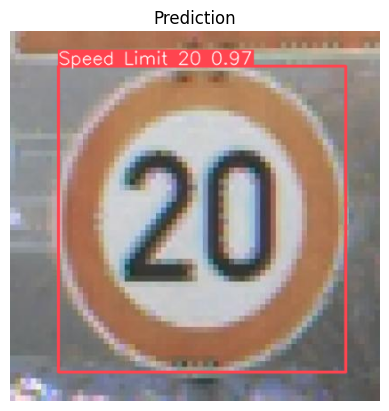

Image Class Prediction is, 6


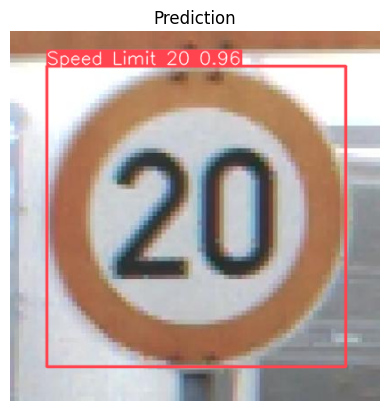

Image Class Prediction is, 6


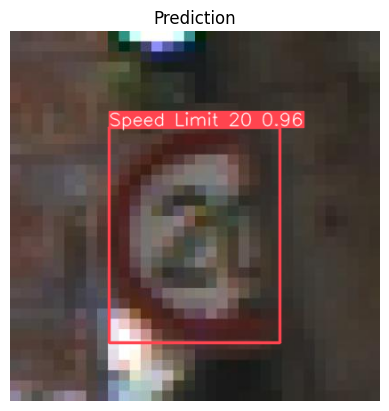

Image Class Prediction is, 6


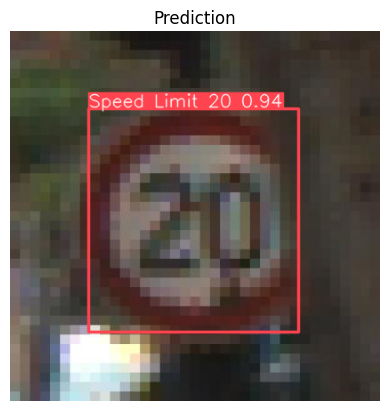

Image Class Prediction is, 6


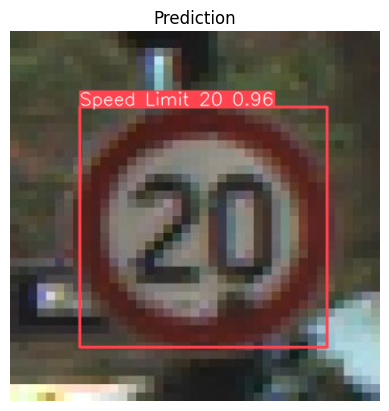

In [13]:
#showing up 5 images to see their predictions 

for i in range(5):
    cnt = i + 30
    print('Image Class Prediction is,',int(predictions[cnt].boxes.cls))
    image_with_predictions = predictions[cnt].plot()
    image_rgb = cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.title('Prediction')
    plt.axis('off')  # Optional: Turn off axis labels

    plt.show()

In [33]:
'''
if you need to back the model performance as cvs format, here:

import wandb
import pandas as pd

api = wandb.Api()

# mcagricivici-nonamecompany/car_detection_project/x6f3axrl
entity = "mcagricivici-nonamecompany"
project = "car_detection_project" 
run_id = "x6f3axrl"   

# Fetch the run
run = api.run(f"{entity}/{project}/{run_id}")

history = run.history()

df = pd.DataFrame(history)

df[20:30]


'''


val_batch2_labels  train/box_loss  \
20                                               None         0.55292   
21                                               None         0.55053   
22                                               None         0.53801   
23                                               None         0.52460   
24                                               None         0.53103   
25                                               None         0.51148   
26                                               None         0.50623   
27                                               None         0.50120   
28                                               None         0.49040   
29  {'path': 'media/images/val_batch2_labels_30_0f...         0.48676   

    metrics/precision(B)                                    val_batch1_pred  \
20              0.941920                                               None   
21              0.923310                                               None   
22              0.944550                                               None   
23              0.932200                                               None   
24              0.946100                                               None   
25              0.956630                                               None   
26              0.958810                                               None   
27              0.950050                                               None   
28              0.962090                                               None   
29              0.922476  {'_type': 'image-file', 'format': 'jpg', 'path...   

    model/speed_PyTorch(ms)  train/dfl_loss  model/parameters    lr/pg2  \
20                      NaN         0.93500               NaN  0.000179   
21                      NaN         0.93338               NaN  0.000161   
22                      NaN         0.92893               NaN  0.000144   
23                      NaN         0.92762               NaN  0.000127   
24                      NaN         0.92235               NaN  0.000109   
25                      NaN         0.91562               NaN  0.000092   
26                      NaN         0.90694               NaN  0.000075   
27                      NaN         0.90845               NaN  0.000057   
28                      NaN         0.90466               NaN  0.000040   
29                      NaN         0.90120               NaN  0.000023   

    metrics/mAP50(B) labels  ...  \
20          0.933180   None  ...   
21          0.936090   None  ...   
22          0.945840   None  ...   
23          0.948990   None  ...   
24          0.951700   None  ...   
25          0.956650   None  ...   
26          0.954000   None  ...   
27          0.959500   None  ...   
28          0.959370   None  ...   
29          0.959499   None  ...   

                                      train_batch1080    _timestamp  \
20  {'width': 1920, '_type': 'image-file', 'format...  1.724326e+09   
21                                               None  1.724326e+09   
22                                               None  1.724326e+09   
23                                               None  1.724326e+09   
24                                               None  1.724326e+09   
25                                               None  1.724326e+09   
26                                               None  1.724326e+09   
27                                               None  1.724326e+09   
28                                               None  1.724326e+09   
29                                               None  1.724326e+09   

                                              R_curve  \
20                                               None   
21                                               None   
22                                               None   
23                                               None   
24                                               None   
25             

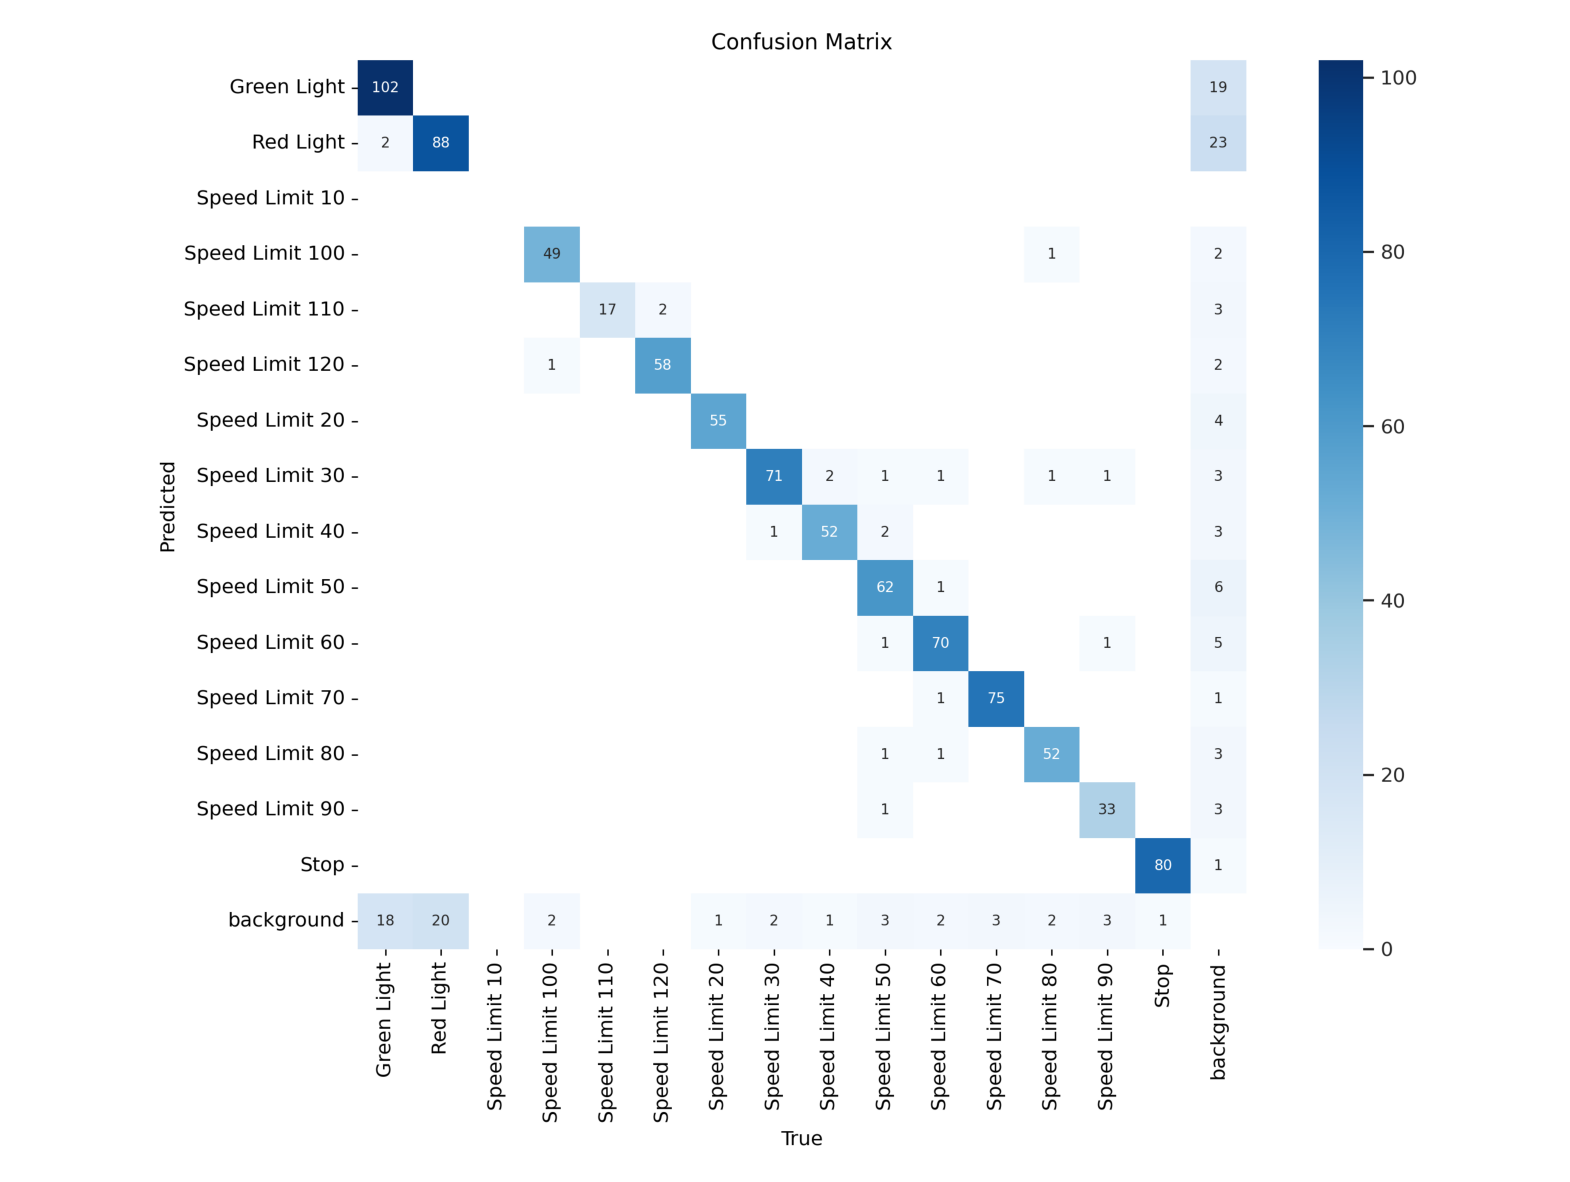

In [14]:
cm_link = '/kaggle/working/runs/detect/train/confusion_matrix.png'

cm_img_rgb = cv2.cvtColor(cv2.imread(cm_link), cv2.COLOR_BGR2RGB)
    
# Display the image using Matplotlib
plt.figure(figsize=(20, 20))  # Adjust the size as needed
plt.imshow(cm_img_rgb)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

/kaggle/working/runs/detect/train/results.png


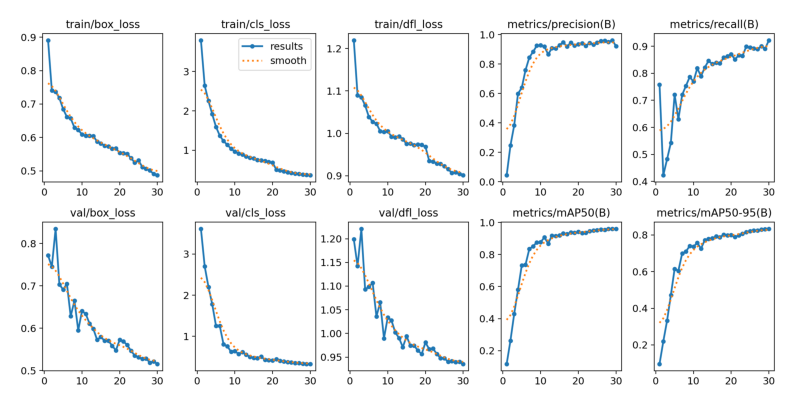

In [15]:
myroot = '/kaggle/working/runs/detect/train'
image_set = 'results.png'

link = os.path.join(myroot,image_set)
print(link)
plot = cv2.cvtColor(cv2.imread(link), cv2.COLOR_BGR2RGB)
    
# Display the image using Matplotlib
plt.figure(figsize=(10, 10))  # Adjust the size as needed
plt.imshow(plot)
plt.axis('off') 
plt.show()

# Interpretting plots:

* **Box_loss**: while estimating the boundries in a object, how succesful the model predicts in boundries. In train and validation, we expect the box_loss to decrease.

* **Cls_loss**: (class_loss) it refers that what the model predicts is aligned with the classification of image. While training the model, we expect the model to predict correct classifications so the loss to decrease.

* **Precision**: it measures how successfull your prediction is; in the other words, How the percentage of prediction is correct. (True Positive / (True Positive + False Positive)) [how positive is it]

* **Recall**: it measures how successful the model predict objects among all images that has objects.

* **Mean Average Precision (mAP)**: how the edge detection in prediction suits to the edge of the objects. The bigger rate it has, the more overlap the prediction and object intersects each other.



In [16]:
mydata = '/kaggle/working/runs/detect/train/results.csv'
k=pd.read_csv(mydata)

first_5_rows = k.iloc[:5]  # First 5 rows
last_5_rows = k.iloc[-5:]  # Last 5 rows

# Concatenate the two DataFrames
result = pd.concat([first_5_rows, last_5_rows])
result.head(10)

epoch        train/box_loss        train/cls_loss  \
0                      1               0.89118               3.79250   
1                      2               0.74036               2.63960   
2                      3               0.73712               2.25170   
3                      4               0.71802               1.91540   
4                      5               0.68472               1.59330   
25                    26               0.51148               0.40593   
26                    27               0.50623               0.39834   
27                    28               0.50120               0.38575   
28                    29               0.49040               0.37197   
29                    30               0.48676               0.36627   

          train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.21940               0.04434               0.75808   
1                1.08960               0.24614               0.42284   
2                1.08520               0.38411               0.48237   
3                1.06590               0.59861               0.54279   
4                1.03870               0.63920               0.72129   
25               0.91562               0.95663               0.89162   
26               0.90694               0.95881               0.88945   
27               0.90845               0.95005               0.89994   
28               0.90466               0.96209               0.89044   
29               0.90120               0.92258               0.92223   

        metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0                0.11748               0.09647               0.77181   
1                0.26260               0.21950               0.74549   
2                0.43020               0.33263               0.83456   
3                0.57964               0.47179               0.70338   
4                0.73172               0.61548               0.69118   
25               0.95665               0.82464               0.52779   
26               0.95400               0.82377               0.52835   
27               0.95950               0.82907               0.51872   
28               0.95937               0.83092               0.52166   
29               0.95959               0.83335               0.51559   

            val/cls_loss          val/dfl_loss                lr/pg0  \
0                3.60870               1.19880              0.000172   
1                2.69820               1.14220              0.000336   
2                2.19800               1.22080              0.000488   
3                1.77720               1.09340              0.000474   
4                1.25140               1.09840              0.000457   
25               0.35395               0.94023              0.000092   
26               0.35301               0.94138              0.000075   
27               0.33561               0.93939              0.000057   
28               0.33102               0.93993              0.000040   
29               0.33110               0.93560              0.000023   

                  lr/pg1                lr/pg2  
0               0.000172              0.000172  
1               0.000336              0.000336  
2               0.000488              0.000488  
3               0.000474              0.000474  
4               0.000457              0.000457  
25              0.000092              0.000092  
26              0.000075              0.000075  
27              0.000057              0.000057  
28              0.000040              0.000040  
29              0.000023              0.000023


image 1/1 /kaggle/input/cardetection/car/train/images/00000_00001_00022_png.rf.53d2ec9d6d92ab4d0edfcb6592d6f4fd.jpg: 640x640 1 Speed Limit 20, 11.7ms
Speed: 2.8ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
1 : tensor([6.], device='cuda:0')

image 1/1 /kaggle/input/cardetection/car/train/images/00008_00004_00020_png.rf.70461d631adaa4613b97abbde3dcca62.jpg: 640x640 1 Speed Limit 120, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
2 : tensor([5.], device='cuda:0')

image 1/1 /kaggle/input/cardetection/car/train/images/000844_jpg.rf.6fab11a473d29cecbb8affb9b3bc70bb.jpg: 640x640 1 Speed Limit 90, 7.2ms
Speed: 2.2ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
3 : tensor([13.], device='cuda:0')

image 1/1 /kaggle/input/cardetection/car/train/images/000243_jpg.rf.8ef08ce07a0885b98caee0372d61bca0.jpg: 640x640 1 Speed Limit 40, 6.8ms
Speed: 2.1ms preprocess, 6.8

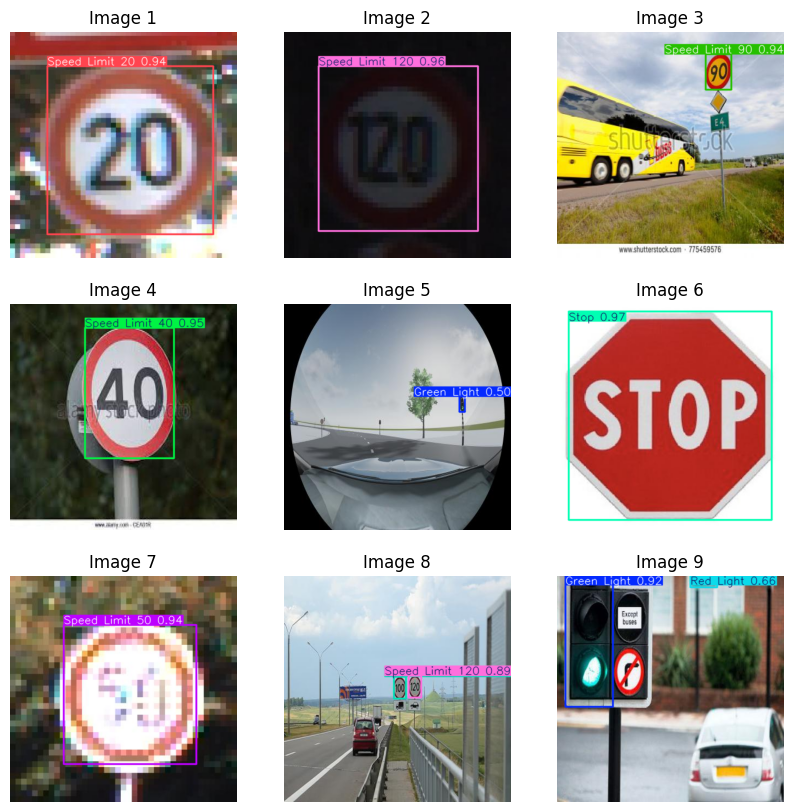

In [17]:
cnt = 9 #Select 9 images randomly from test_link so let the model predicts them 
test_link = '/kaggle/input/cardetection/car/test'
test_images = [os.path.join(inp_dir,'images',each) for each in os.listdir(os.path.join(inp_dir,'images'))]

test_image = random.sample(test_images,cnt)

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

i,j = 0,0

for i in range(3):
    for j in range(3):
        cnt = (i*3)+j
        link = test_image[cnt]
        
        prediction = Final_model.predict(link) #using the model we trained before for predicting test data.
        print(cnt+1,':',prediction[0].boxes.cls) #We will see how many object we can detect
        
        image_with_predictions = prediction[0].plot() 
        image_rgb = cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB)

        
        axs[i, j].imshow(image_rgb)
        axs[i, j].set_title(f'Image {cnt + 1}')
        axs[i, j].axis('off')  # Hide the axes


In [21]:
from IPython.display import Video


#recapture the video to break down into fps, width, height info that will be used by the model i trained above
raw_video_link = '/kaggle/working/mraw_output.mp4'
cap = cv2.VideoCapture(raw_video_link) # In order to do that, i need to get video with VideoCapture, not calling raw_video parameter

# When you are writing a video file with OpenCV, you typically need to specify the codec, the frames per second (FPS), and the size of the video frames. 
# The fourcc code is part of this process.
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second of the input video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Width of the frame
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Height of the frame

# create VideoWriter object
output_path = '/kaggle/working/final_video.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Returns true if video capturing has been initialized already
while cap.isOpened(): 
    ret, frame = cap.read() # cv.VideoCapture.read([, image]) ->retval(if frame available or not) , image (frame)
    
    if not ret: # false if no frames has been grabbed
        break  # Exit the loop if no more frames are available
        
    # Step 5: Apply the prediction model to the frame
    results = Final_model.predict(frame)
    # Step 6: Annotate the frame with predictions
    annotated_frame = results[0].plot()  # Automatically plots bounding boxes and labels
    

    # Step 7: Write the annotated frame to the output video
    out.write(annotated_frame)
        
## Step 8: Release resources
cap.release()
out.release()

print(f"Processed video saved as {output_path}")



0: 640x640 1 Stop, 12.0ms
Speed: 3.8ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 7.1ms
Speed: 3.2ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 6.5ms
Speed: 2.2ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 6.5ms
Speed: 2.1ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 6.3ms
Speed: 2.2ms preprocess, 6.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 6.4ms
Speed: 2.1ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 6.5ms
Speed: 2.2ms preprocess, 6.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 6.5ms
Speed: 2.3ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 

In [22]:
# This command converts the video located at /kaggle/input/cardetection/video.mp4 to output.mp4. 
# The -y flag overwrites any existing output.mp4 without asking, and -
# loglevel panic reduces the verbosity of the output.

###ORIGINAL VIDEO###
!ffmpeg -y -loglevel panic -i /kaggle/input/cardetection/video.mp4 mraw_output.mp4
raw_video = Video('mraw_output.mp4', width=480)
# Explicitly display the video
print('Original image is here:')
display(raw_video)

###PREDICTED VIDEO###
!ffmpeg -y -loglevel panic -i /kaggle/working/final_video.mp4 output.mp4
raw_video = Video('output.mp4', width=480)
# Display the video
print('Predicted Video')
display(raw_video)


Original image is here:


Predicted Video


# Testing the model with test image:

In [24]:
#this definition will return the values of class, x1,y1,x2,y2 (to be rectangular)
def get_ground_truth(path,width,height):
    width = width
    height = height
    
     # Get the base name (filename with extension)
    base_name_w = os.path.basename(path)
    # Remove the extension to get just the name
    base_name = os.path.splitext(base_name_w)[0]
    
    
    image = path
    
    label = path.replace('images','labels')
    label = label.replace('.jpg','.txt')
    
    gnd_truth = []
    
    with open(label, 'r') as file:
        lines = file.readlines()
        for line in lines:
            
            # Split the line into parts based on spaces
            parts = line.split()

            # Assign each part to its corresponding variable
            class_id = int(parts[0])
            center_x = float(parts[1])
            center_y = float(parts[2])
            bbox_width = float(parts[3])
            bbox_height = float(parts[4])
            
            
            #make normalize:
            center_x = center_x * width
            center_y = center_y * height
            bbox_width = bbox_width * width
            bbox_height = bbox_height * height
    
            
            x1 = center_x - (bbox_width / 2)
            x2 = center_x + (bbox_width / 2)
            y1 = center_y - (bbox_height / 2)
            y2 = center_y + (bbox_height / 2)
            
            print(x1)
            
            gnd_truth.append([base_name,class_id,x1,y1,x2,y2]) 
            
    return gnd_truth,base_name
            
    

In [25]:
image = "/kaggle/input/cardetection/car/test/images"


image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir)])
nmb = len(image_files)

y_pred = []
y_true = []

one = 0

for each in image_files:
    one +=1
    msg = 'image'+str(one)+'/'+str(nmb)
   
    #my_list = [base_name]
    print(msg)
    k = Final_model.predict(each)
    pred_image = k[0].plot()
    (w,h) = pred_image.shape[:2]
    #print(w,h)
    
    #learnt data from label -- y_true
    metadata,base_name = get_ground_truth(each,w,h)
    y_true.extend(metadata)


    # Loop through each predicted box if there are multiple predictions
    for i in range(len(k[0].boxes)):
        cls_id = int(k[0].boxes.cls[i])  # Access each class ID and convert to int
        #print(f"Class ID for box {i}: {cls_id}")

        # If you want to get the coordinates (x1, y1, x2, y2) for each box
        box = k[0].boxes.xyxy[i].tolist()  # Assuming xyxy holds the box coordinates in [x1, y1, x2, y2] format
        x1, y1, x2, y2 = box
        
        mylist = [base_name,cls_id,x1,y1,x2,y2]
        
        y_pred.append(mylist)
        
        #print(f"Box {i} coordinates: (x1, y1, x2, y2) = ({x1}, {y1}, {x2}, {y2})")
    
    
    

image1/638

image 1/1 /kaggle/input/cardetection/car/test/images/000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg: 640x640 1 Speed Limit 30, 14.1ms
Speed: 4.2ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
110.75
image2/638

image 1/1 /kaggle/input/cardetection/car/test/images/000006_jpg.rf.89610ec419ccfab22f8314026b90ee26.jpg: 640x640 1 Speed Limit 30, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
97.5
image3/638

image 1/1 /kaggle/input/cardetection/car/test/images/00000_00000_00003_png.rf.d18afc3c9625ffb1974029d3e3762aee.jpg: 640x640 1 Speed Limit 20, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
100.74999999999997
image4/638

image 1/1 /kaggle/input/cardetection/car/test/images/00000_00000_00005_png.rf.ab60a274676963d378f5014e89d9e2b1.jpg: 640x640 1 Speed Limit 20, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 1.2ms postprocess p

In [26]:
len(y_pred)

764

In [27]:
len(y_true)

770

In [28]:
def calculate_iou(filename, class_id_true, coord_true, y_pred):
    best_iou = 0
    best_match = None
    
    for each in y_pred:
        if each[0] == filename and each[1] == class_id_true:
            coord_pred = each[2:]
            
            # Calculate intersection
            x1_intersection = max(coord_true[0], coord_pred[0])
            y1_intersection = max(coord_true[1], coord_pred[1])
            x2_intersection = min(coord_true[2], coord_pred[2])
            y2_intersection = min(coord_true[3], coord_pred[3])
            
            intersection_area = max(0, x2_intersection - x1_intersection) * max(0, y2_intersection - y1_intersection)
    
            # Calculate areas
            box1_area = (coord_true[2] - coord_true[0]) * (coord_true[3] - coord_true[1])
            box2_area = (coord_pred[2] - coord_pred[0]) * (coord_pred[3] - coord_pred[1])
            
            # Calculate union area
            union_area = box1_area + box2_area - intersection_area
            
            # Calculate IoU
            iou = intersection_area / union_area
            
            if iou > best_iou:
                best_iou = iou
                best_match = each
    
    if best_match:
        y_pred.remove(best_match)
    
    print(f'deneme: {filename}: {best_iou}')
    return best_iou



In [29]:
y_true[0]

['000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d',
 7,
 110.75,
 67.5,
 305.25,
 331.5]

In [30]:
iou_list = []

for each in (y_true):

    filename = each[0]
    class_id_true = each[1]
    coord_true = each[2:]
    
    iou_value = calculate_iou(filename, class_id_true, coord_true, y_pred)
    iou_list.append(iou_value)

deneme: 000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d: 0.9563404568668191
deneme: 000006_jpg.rf.89610ec419ccfab22f8314026b90ee26: 0.9622382124148686
deneme: 00000_00000_00003_png.rf.d18afc3c9625ffb1974029d3e3762aee: 0.9415426661729158
deneme: 00000_00000_00005_png.rf.ab60a274676963d378f5014e89d9e2b1: 0.9532503609026975
deneme: 00000_00000_00006_png.rf.9d1ea68507aff6973a1dbcdc6f4422a8: 0.9405300337795929
deneme: 00000_00000_00008_png.rf.ff305dcd6e9ceb9188937311a4a1b207: 0.9548571959003894
deneme: 00000_00000_00013_png.rf.9076cbfc7f7811fa22547539a7e7ac02: 0.9406431172800899
deneme: 00000_00000_00017_png.rf.6c2381a6a103a041f23159fbd44868ed: 0.9597394771481237
deneme: 00000_00000_00021_png.rf.0803f8eb5b4566c44100cfef9d0bfa8e: 0.9777475323975329
deneme: 00000_00000_00024_png.rf.8b21eb79678eed47df52a9ab4319bc08: 0.9628633519674308
deneme: 00000_00001_00008_png.rf.936b0185c3b9131c96d42d60a5da1abb: 0.8959065056110713
deneme: 00000_00001_00013_png.rf.c2367f9d1b377597b2cc3706b70fa818: 0.9129385

In [71]:
y_true[0]

['000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d',
 7,
 110.75,
 67.5,
 305.25,
 331.5]

In [32]:
len(iou_list)

770

In [33]:
mypredict = {'filename': [each[0] for each in y_pred],
          'class': [each[1] for each in y_pred],
          'x1': [each[2] for each in y_pred],
          'y1': [each[3] for each in y_pred],
          'x2': [each[4] for each in y_pred],
          'y2': [each[5] for each in y_pred]
         }

In [34]:
df_pred = pd.DataFrame(mypredict)
df_pred.to_csv('/kaggle/working/prediction_excel.csv', index=False)

In [35]:
mytrue = {'filename': [each[0] for each in y_true],
          'class': [each[1] for each in y_true],
          'x1': [each[2] for each in y_true],
          'y1': [each[3] for each in y_true],
          'x2': [each[4] for each in y_true],
          'y2': [each[5] for each in y_true],
          'IOU': [each for each in iou_list]
         }

In [36]:
df_true = pd.DataFrame(mytrue)

In [37]:
df_true.head(10)

filename  class      x1      y1  \
0     000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d      7  110.75   67.50   
1     000006_jpg.rf.89610ec419ccfab22f8314026b90ee26      7   97.50    0.75   
2  00000_00000_00003_png.rf.d18afc3c9625ffb197402...      6  100.75   94.50   
3  00000_00000_00005_png.rf.ab60a274676963d378f50...      6   94.00   94.25   
4  00000_00000_00006_png.rf.9d1ea68507aff6973a1db...      6  103.50  106.75   
5  00000_00000_00008_png.rf.ff305dcd6e9ceb9188937...      6   74.50   79.75   
6  00000_00000_00013_png.rf.9076cbfc7f7811fa22547...      6   71.00   54.50   
7  00000_00000_00017_png.rf.6c2381a6a103a041f2315...      6   60.50   63.50   
8  00000_00000_00021_png.rf.0803f8eb5b4566c44100c...      6   58.50   58.00   
9  00000_00000_00024_png.rf.8b21eb79678eed47df52a...      6   38.00   39.00   

       x2      y2       IOU  
0  305.25  331.50  0.956340  
1  214.50  138.25  0.962238  
2  338.25  326.50  0.941543  
3  347.00  346.75  0.953250  
4  343.50  353.25  0.940530  
5  339.50  346.25  0.954857  
6  374.00  357.50  0.940643  
7  380.50  374.50  0.959739  
8  384.50  387.00  0.977748  
9  388.00  386.00  0.962863

In [39]:
# Save the DataFrame to a CSV file
df_true.to_csv('/kaggle/working/iuoresult.csv', index=False)

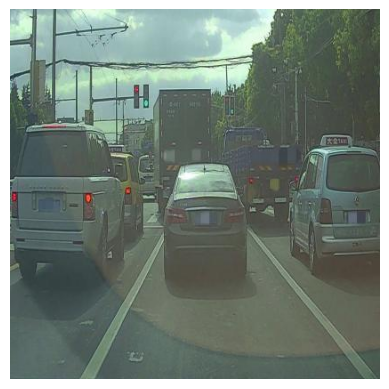

In [41]:
test = '/kaggle/input/cardetection/car/test/images/000792_jpg.rf.3899b0ef3229b4f18a7954698cc40c92.jpg'

img = cv2.imread(test)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [42]:
prd = Final_model.predict(test)
# Assuming the first prediction is what you want to examine
t=prd[0].boxes.cls



image 1/1 /kaggle/input/cardetection/car/test/images/000792_jpg.rf.3899b0ef3229b4f18a7954698cc40c92.jpg: 640x640 2 Green Lights, 2 Red Lights, 10.8ms
Speed: 3.2ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


In [43]:
bounding_boxes = prd[0].boxes.xyxy
len(bounding_boxes)
#It means that 4 prediction was found as we see in the excel we generated.

4

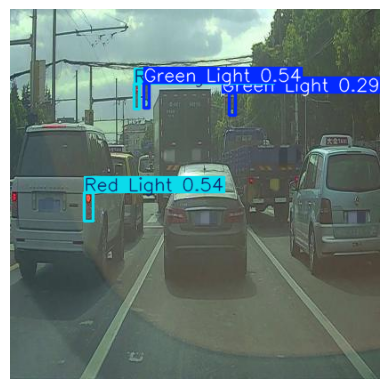

In [44]:
image_with_predictions = prd[0].plot() 
image_rgb = cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

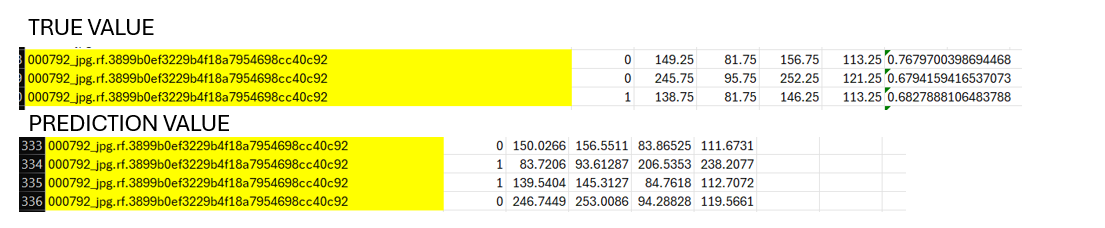

**For example: this image below has 3 true value, but its predictions has 4 value - 2 Green Lights, 2 Red Lights,**


In [45]:
mean_iou = sum(iou_list) / len(iou_list)
print("Mean IoU (mIoU):", mean_iou)

Mean IoU (mIoU): 0.8117766548351557


In [46]:
threshold = 0.5 
true_positives = sum(1 for iou in iou_list if iou >= threshold)
precision = true_positives / len(iou_list)
print(f"Precision at IoU > {threshold}:", precision)

Precision at IoU > 0.5: 0.8974025974025974


In [47]:
recall = true_positives / len(y_true)  # You need to know the total number of ground truth boxes
print(f"Recall at IoU > {threshold}:", recall)


Recall at IoU > 0.5: 0.8974025974025974


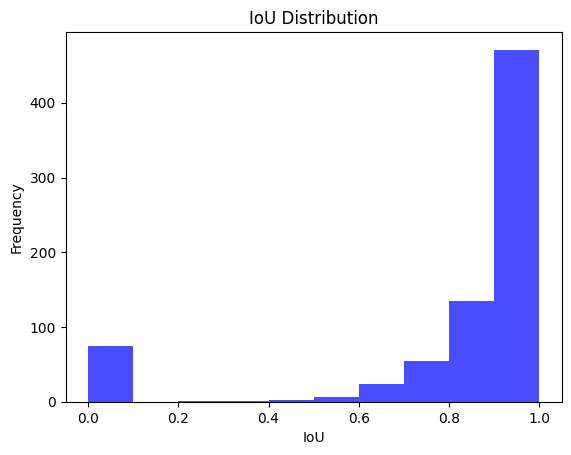

In [48]:
import matplotlib.pyplot as plt

plt.hist(iou_list, bins=10, range=(0, 1), alpha=0.7, color='blue')
plt.title("IoU Distribution")
plt.xlabel("IoU")
plt.ylabel("Frequency")
plt.show()


image 1/1 /kaggle/input/cardetection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg: 640x640 1 Speed Limit 20, 9.3ms
Speed: 3.4ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


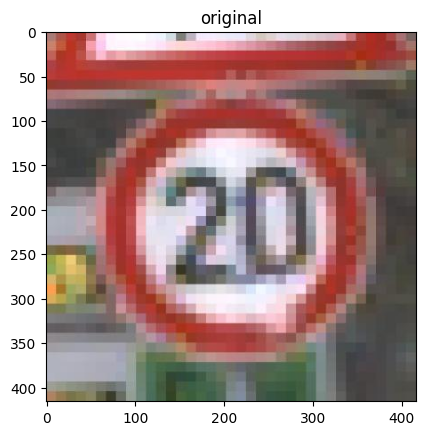

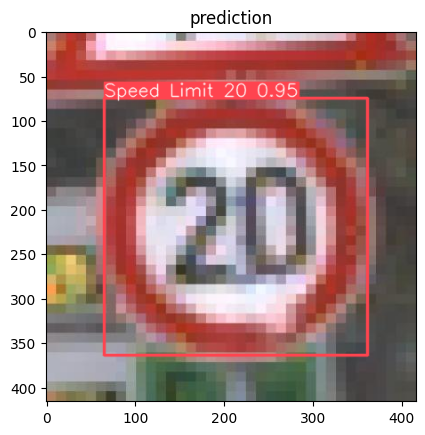

In [49]:
#  in the code early, this was predicted as person:
image = '/kaggle/input/cardetection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg'

result_predict = Final_model.predict(source = image, imgsz=(640))

img = cv2.imread(image)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title('original')
plt.imshow(img)
plt.show()


#prediction in original image
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
plt.title('prediction')
plt.imshow(plot)
plt.show()


#now, it is as it is :)